In [1]:
from __future__ import division, print_function
import sys, os, glob, gc, warnings
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import matplotlib.pyplot as plt

import healpy as hp

from desiutil.plots import init_sky, plot_sky_binned

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

plt.rcParams['image.cmap'] = 'seismic'

----------

In [3]:
nside = 64
npix = hp.nside2npix(nside)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

hp_table_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('north', nside))
hp_table_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('south', nside))

mask = hp_table_north['dec'] > 32.375
hp_table_north = hp_table_north[mask]
mask = hp_table_south['dec'] <= 32.375
hp_table_south = hp_table_south[mask]

hp_table = vstack([hp_table_north, hp_table_south])

In [4]:
min_count = 500
hp_mask = hp_table['count']>min_count

/Users/rongpu/miniconda3/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds


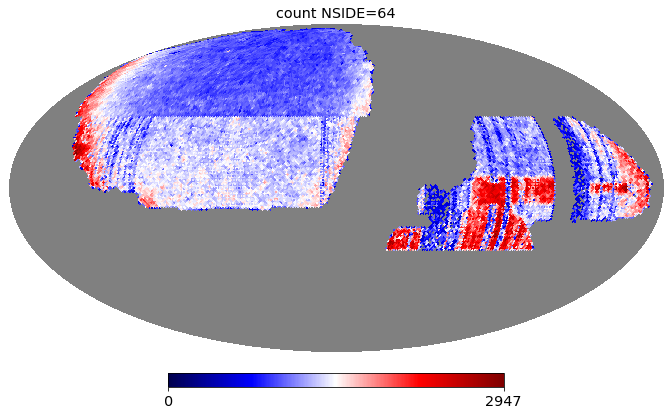

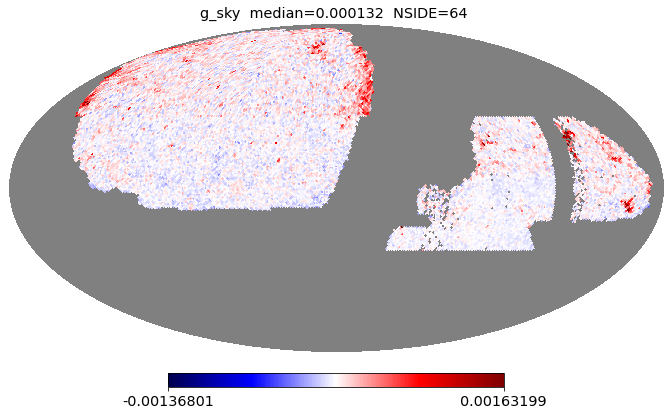

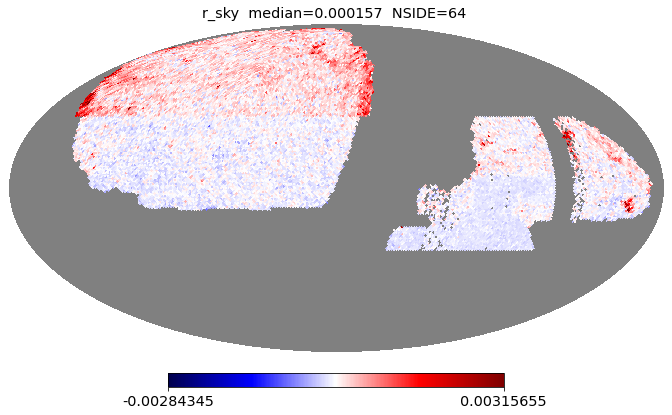

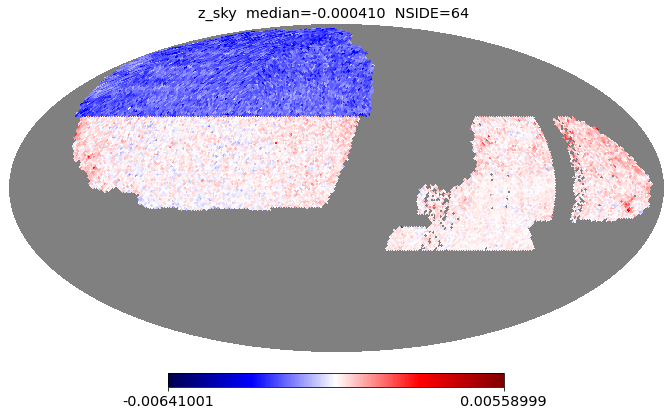

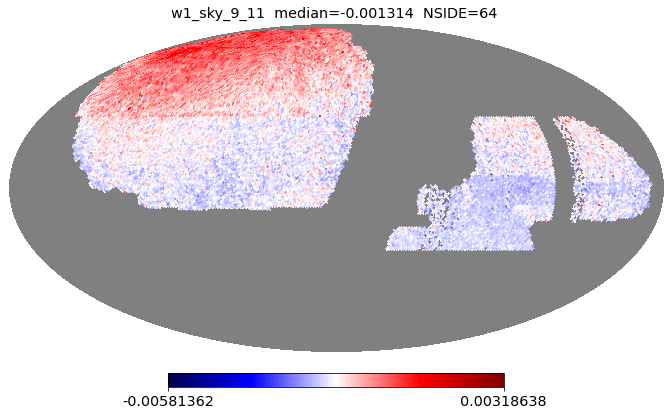

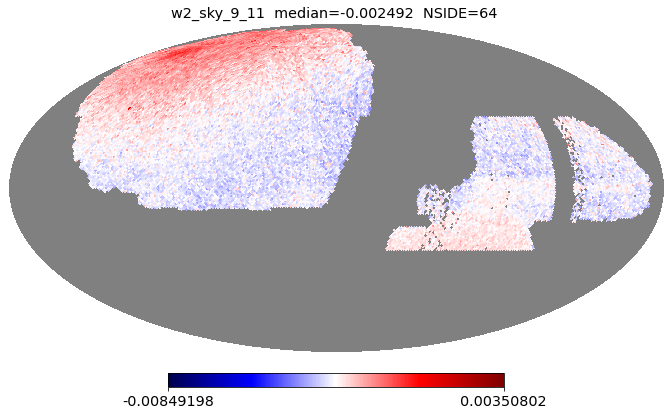

In [5]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky', 'w1_sky_9_11', 'w2_sky_9_11']
vrange_list = [None, 0.001, 0.002, 0.004, 0.003, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*1.5+v_median, max=vrange*1.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=200)
    plt.show()

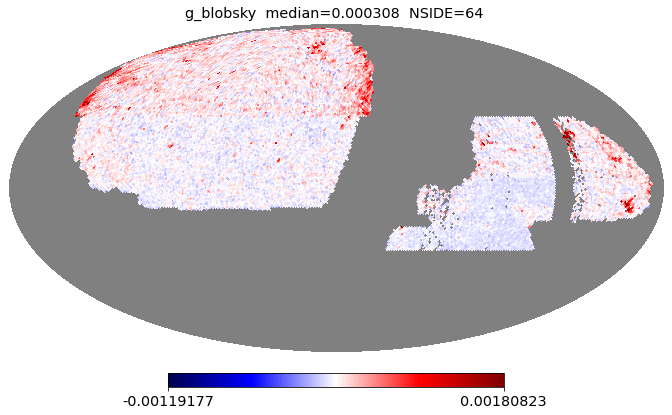

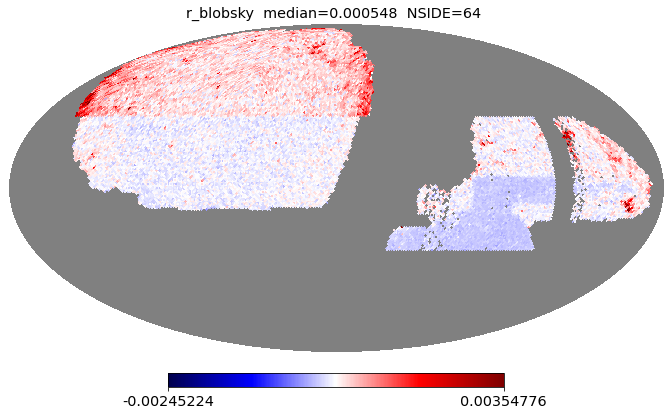

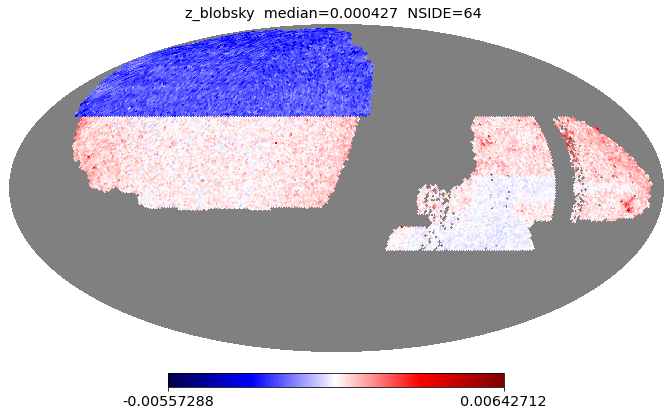

In [6]:
col_list = ['g_blobsky', 'r_blobsky', 'z_blobsky']
vrange_list = [0.001, 0.002, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*1.5+v_median, max=vrange*1.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=200)
    plt.show()

----------

In [7]:
nside = 128
npix = hp.nside2npix(nside)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

hp_table_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('north', nside))
hp_table_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('south', nside))

mask = hp_table_north['dec'] > 32.375
hp_table_north = hp_table_north[mask]
mask = hp_table_south['dec'] <= 32.375
hp_table_south = hp_table_south[mask]

hp_table = vstack([hp_table_north, hp_table_south])

In [8]:
min_count = 100
hp_mask = hp_table['count']>min_count

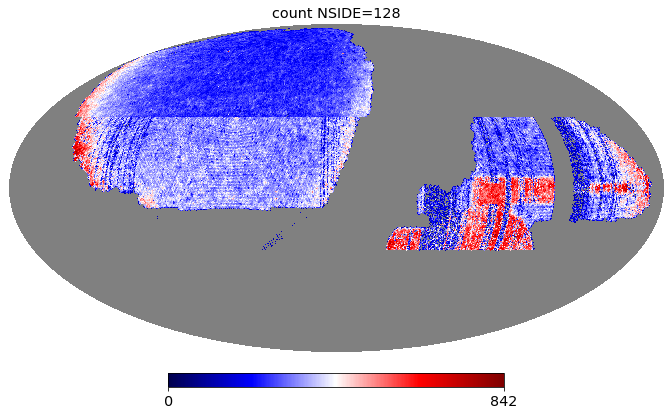

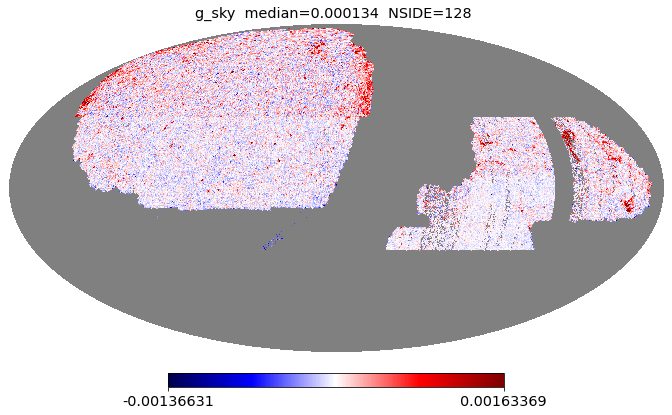

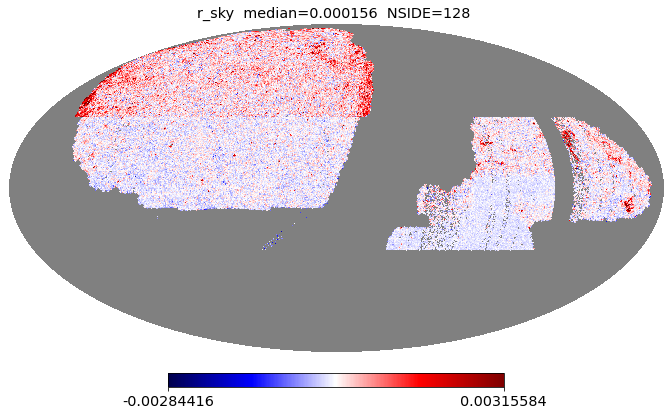

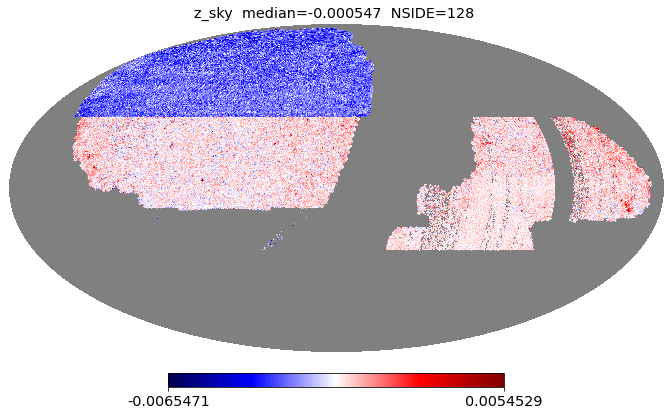

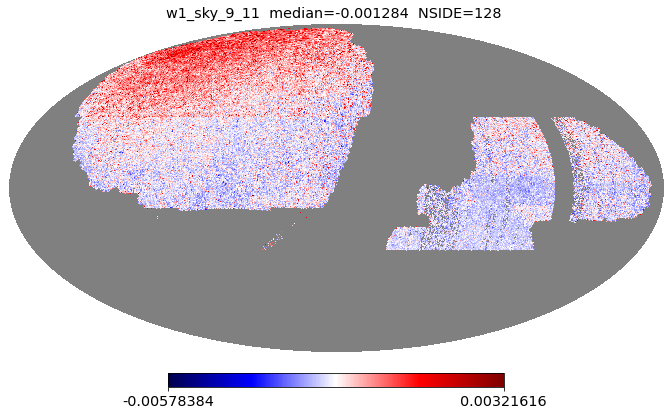

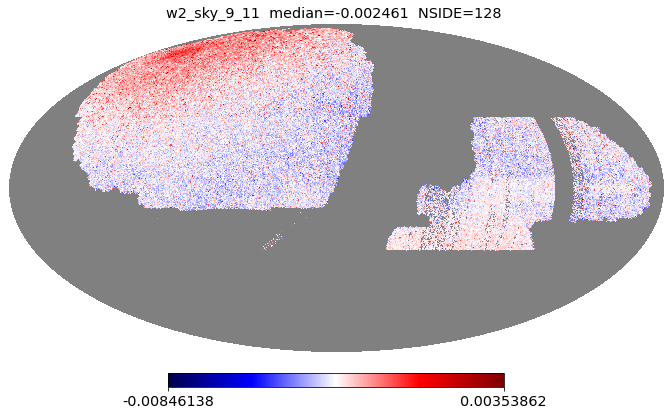

In [9]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky', 'w1_sky_9_11', 'w2_sky_9_11']
vrange_list = [None, 0.001, 0.002, 0.004, 0.003, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*1.5+v_median, max=vrange*1.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=200)
    plt.show()

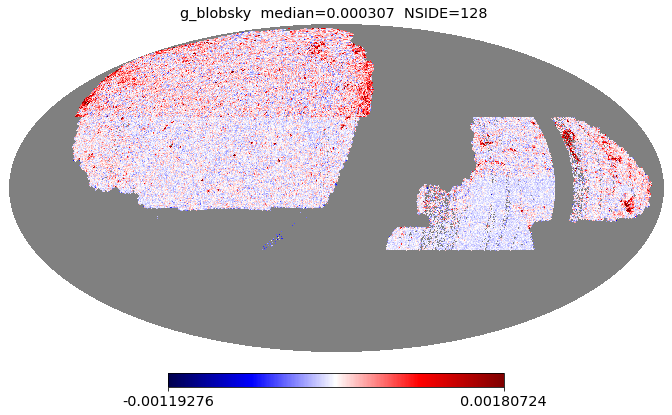

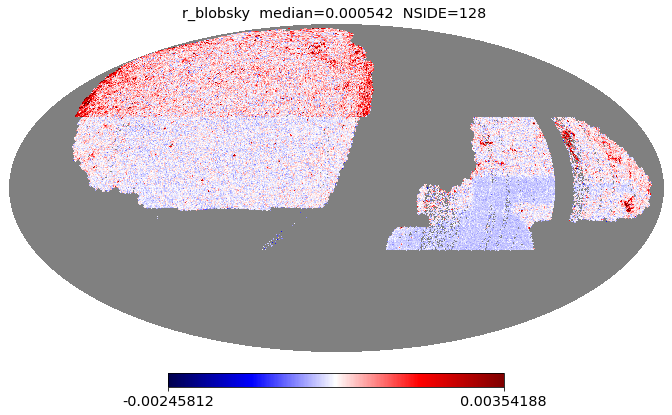

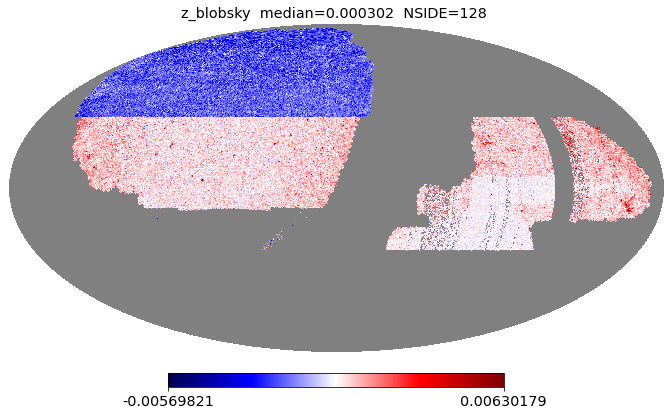

In [10]:
col_list = ['g_blobsky', 'r_blobsky', 'z_blobsky']
vrange_list = [0.001, 0.002, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*1.5+v_median, max=vrange*1.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=200)
    plt.show()

----------

In [16]:
nside = 256
npix = hp.nside2npix(nside)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

hp_table_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('north', nside))
hp_table_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('south', nside))

mask = hp_table_north['dec'] > 32.375
hp_table_north = hp_table_north[mask]
mask = hp_table_south['dec'] <= 32.375
hp_table_south = hp_table_south[mask]

hp_table = vstack([hp_table_north, hp_table_south])

In [17]:
min_count = 10
hp_mask = hp_table['count']>min_count

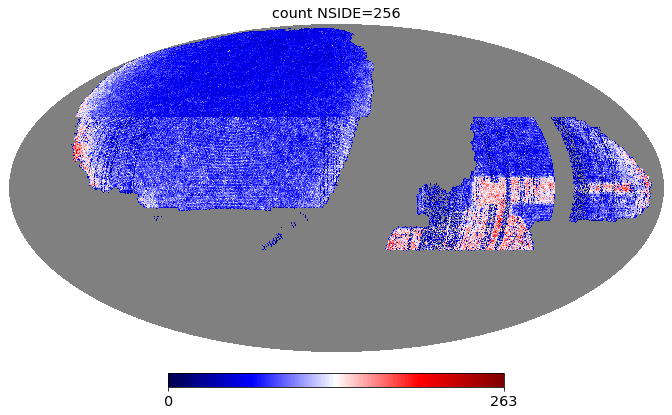

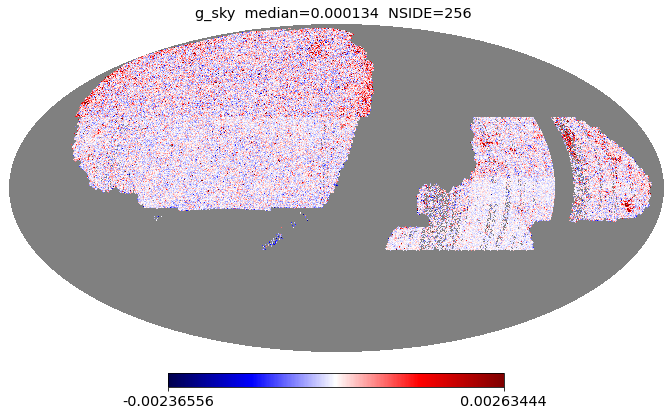

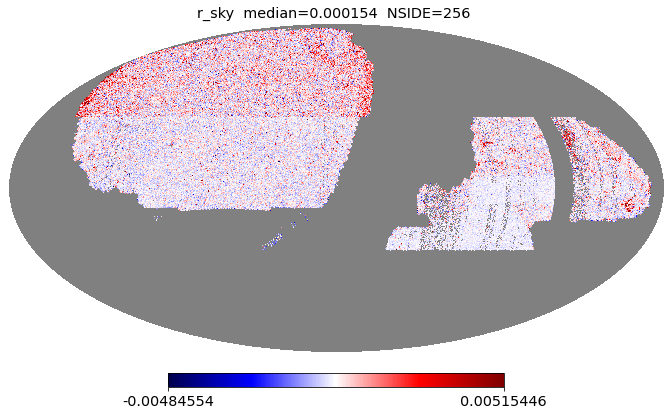

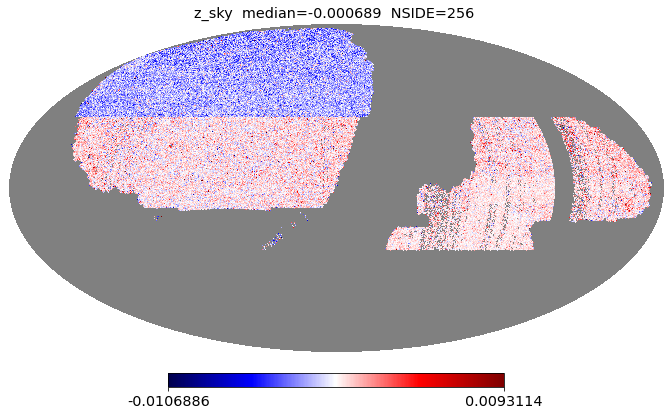

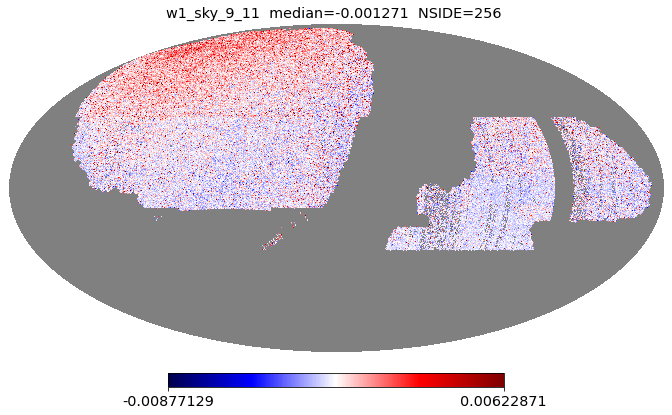

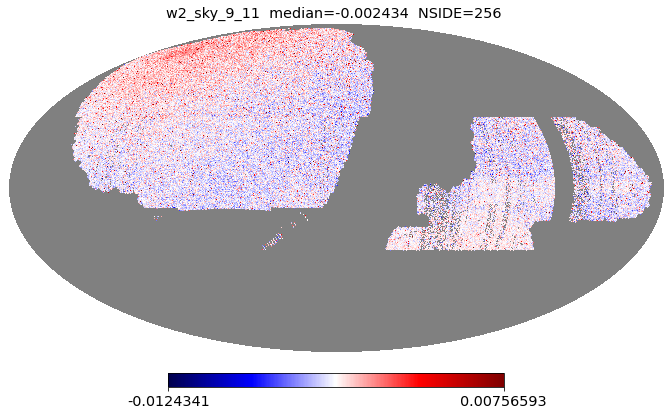

In [18]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky', 'w1_sky_9_11', 'w2_sky_9_11']
vrange_list = [None, 0.001, 0.002, 0.004, 0.003, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*2.5+v_median, max=vrange*2.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=600)
    plt.show()

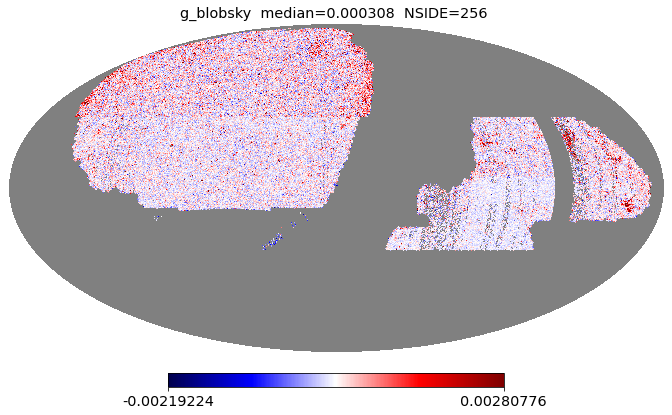

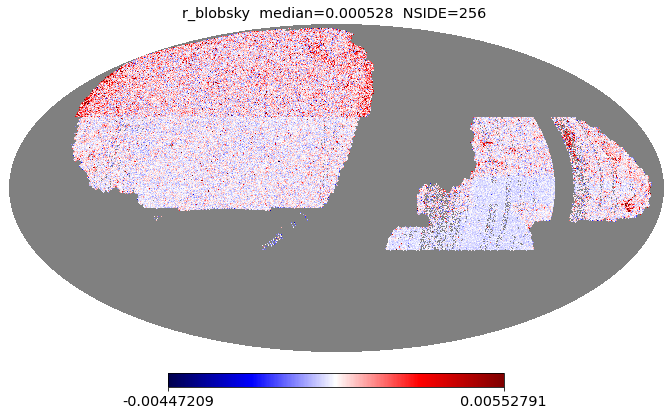

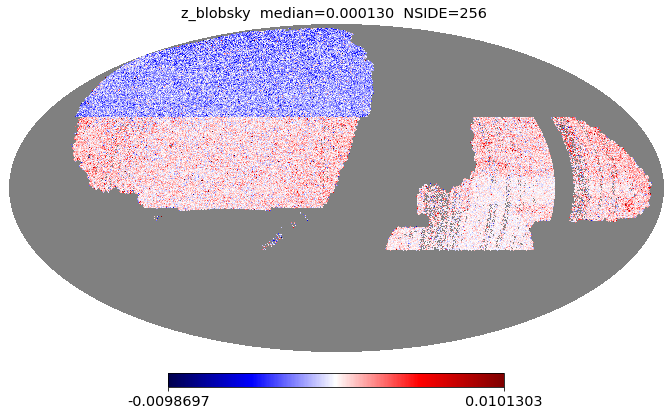

In [19]:
col_list = ['g_blobsky', 'r_blobsky', 'z_blobsky']
vrange_list = [0.001, 0.002, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*2.5+v_median, max=vrange*2.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=600)
    plt.show()

--------
## Different WISE apertures

In [20]:
nside = 128
npix = hp.nside2npix(nside)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

hp_table_north = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('north', nside))
hp_table_south = Table.read('/Users/rongpu/Documents/Data/desi_misc/sky_residuals/sky_residual_dr9_{}_{}.fits'.format('south', nside))

mask = hp_table_north['dec'] > 32.375
hp_table_north = hp_table_north[mask]
mask = hp_table_south['dec'] <= 32.375
hp_table_south = hp_table_south[mask]

hp_table = vstack([hp_table_north, hp_table_south])

In [21]:
min_count = 100
hp_mask = hp_table['count']>min_count

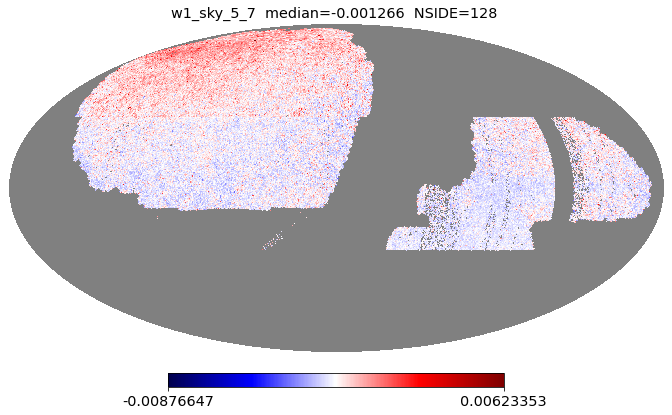

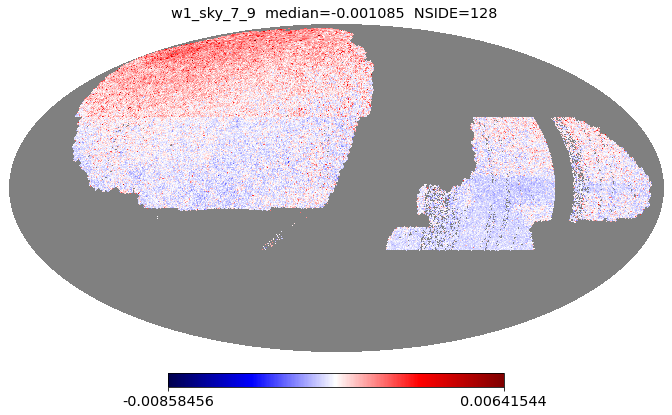

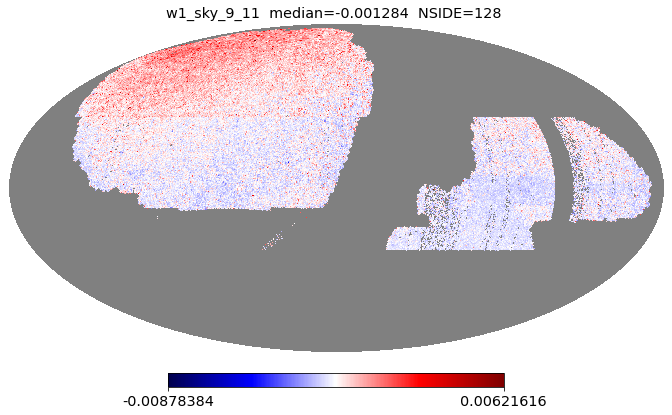

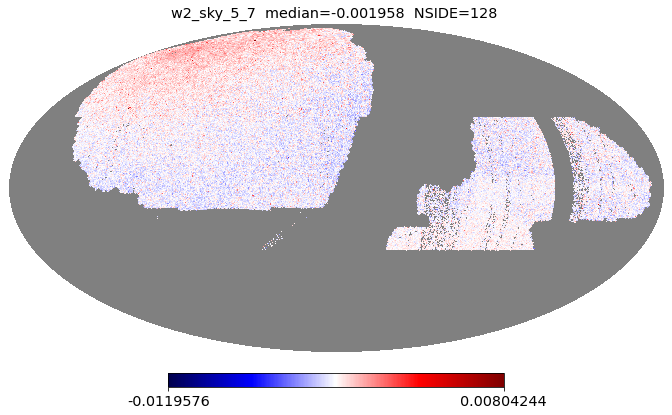

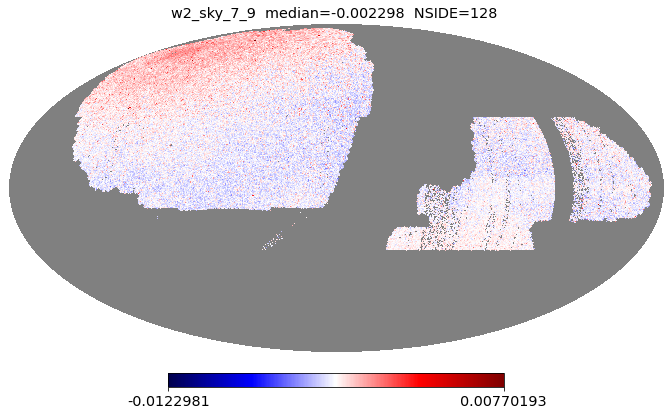

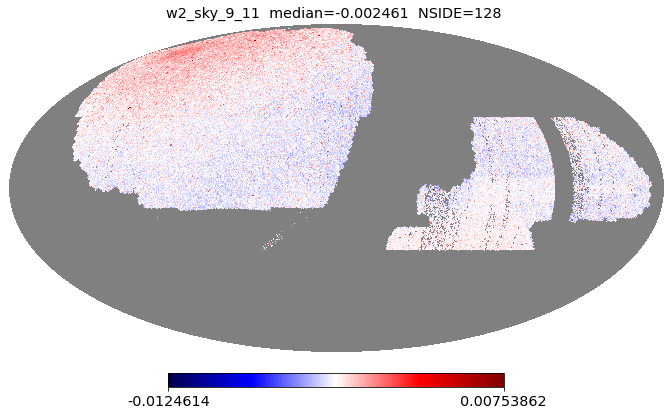

In [23]:
col_list = ['w1_sky_5_7', 'w1_sky_7_9', 'w1_sky_9_11', 'w2_sky_5_7', 'w2_sky_7_9', 'w2_sky_9_11']
vrange_list = [0.003, 0.003, 0.003, 0.004, 0.004, 0.004]

for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask
    
    v = hp_table[col][hp_mask]
    v_median = np.median(v)

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*2.5+v_median, max=vrange*2.5+v_median, rot=(120, 0, 0), fig=1, xsize=8000, title='{}  median={:5f}  NSIDE={} '.format(col, v_median, nside))
    plt.savefig('plots/{}_{}_median_offset.png'.format(col, nside), dpi=200)
    plt.show()